# Generate simple plot for (every) indicator
This **pipeline** shows how to generate a simple sinlge plot beginning with any .csv file in the *source* folder. It is a generic version, which means that for each file minor changes will be needed.

## Preliminars

In [18]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# Call desired data
df_meta = pd.read_csv('Indicators_metadata.csv')
source_name = 'edata_elec_prod'
df = pd.read_csv('source_data/Energy/' + source_name + '.csv')

### Preview of the DataFrame

In [45]:
# Check column names
df.columns

Index(['Country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2016 - 2017 (%) ', '2000 - 2017 (%/year) '],
      dtype='object')

In [ ]:
df.head()

In [ ]:
# Rename column Country column
#df=df.rename(columns={'Country Name':'Country'})
# Check country name available
df.Country.unique()

In [ ]:
# Check column characteristics
df.describe()

### Set Index temporarily to ease manipulation and guarantee final homogeneity

In [46]:
index = ['Country']
df=df.set_index(index)

### Select countries and time range

In [47]:
# Assign selected Countries (carefull with the names: Case sensitive, etc.)
sel_c = ['United States', 'India', 'Germany','China']
# Assign selected Years or interval
sel_y = [2000,2018]#one member more
sel_years = [*range(sel_y[0],sel_y[1])] #using unpacking(*) operator
sel_years_txt = [str(x) for x in sel_years]

In [48]:
# Apply selection criteria
df_p = df[sel_years_txt]
df_p=df_p[df_p.index.isin(sel_c)]

In [49]:
df_p.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,
Germany,577,586,587,609,617,623,639,641,640,596,633,613,630,639,628,647,648,653
United States,4053,3865,4051,4082,4175,4294,4301,4350,4368,4188,4378,4349,4291,4306,4339,4317,4316,4251
China,1356,1481,1654,1911,2204,2500,2866,3282,3467,3715,4208,4716,4994,5447,5679,5860,6165,6529
India,570,588,611,651,684,716,774,824,848,917,979,1075,1123,1191,1294,1383,1463,1541


### Reform the DF to a suitable form

In [50]:
# Reset index to return DF to a tidy state
df_p=df_p.reset_index()

In [51]:
df_p.columns

Index(['Country', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'],
      dtype='object')

In [52]:
# Melt to a Long format
df_p=df_p.melt(id_vars='Country')
#df_p2=df_p.melt()

In [53]:
df_p.head()

,Country,variable,value
0,Germany,2000,577
1,United States,2000,4053
2,China,2000,1356
3,India,2000,570
4,Germany,2001,586


In [54]:
# Rename column to Years
df_p=df_p.rename(columns={'variable':'Years'})

### 2.4 Do further necessary adjustments

In [55]:
# Show column types
display(df_p.dtypes) 

Country    object
Years      object
value       int64
dtype: object

In [56]:
# Coerce column types when needed
df_p.Years=df_p.Years.astype(int, copy=False)#avoiding a warning (carefull)

In [57]:
df_p.describe()

,Years,value
count,72.000000,72.000000
mean,2008.500000,2399.250000
std,5.224536,1847.606383
min,2000.000000,570.000000
25%,2004.000000,645.500000
50%,2008.500000,1472.000000
75%,2013.000000,4261.000000
max,2017.000000,6529.000000


### Extract corresponding metadata 

For this file in particular **5 plots** can be obtain. With their corresponding indicators

In [58]:
# call metadata of the indicator
df_meta_temp = df_meta.set_index('SOURCE FILE')
Units_ind= df_meta_temp['UNIT'][source_name]
Origin_ind= df_meta_temp['SITE'][source_name]
Name_ind =  df_meta_temp['INDICATOR'][source_name]
Key_ind =  df_meta_temp['KEY'][source_name]
Desc_ind =  df_meta_temp['DESCRIPTION'][source_name]

### Plot the indicator

In [59]:
# Here some features of the seaborn package or an eventual coupling 
# with R to use the GGPlot library is to be introduced
# Use Guillermo's preferences for graph aesthetics
sns.set_context('notebook')
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

In [60]:
df_p.head()

,Country,Years,value
0,Germany,2000,577
1,United States,2000,4053
2,China,2000,1356
3,India,2000,570
4,Germany,2001,586


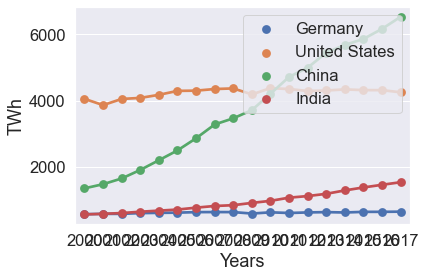

In [61]:
# Simple Plot
plt.figure()
sns.pointplot(x='Years', y='value', data=df_p, hue='Country')
plt.ylabel(Units_ind)
#plt.xlabel('Month')
plt.legend(loc=1)

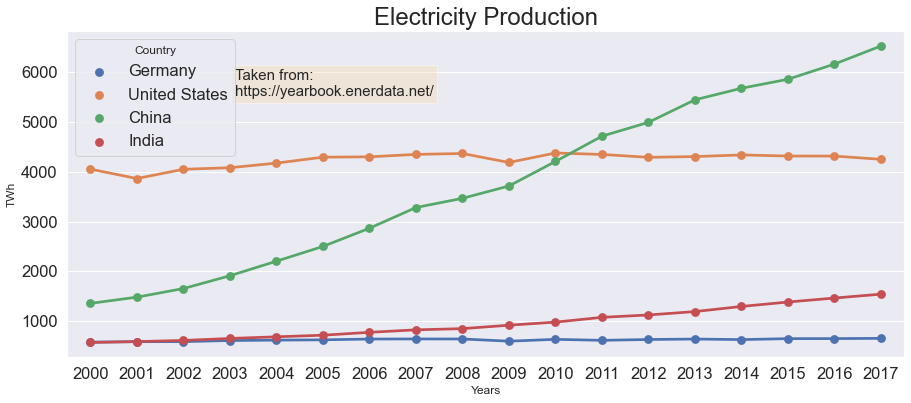

In [63]:
# Sophisticated Plot

# Set figure size (width, height) in inches 
fig, ax = plt.subplots(figsize = ( 15 , 6 )) 
  
# Plot the scatterplot 
sns.pointplot(ax = ax , x='Years', y='value', data=df_p, hue='Country')
#sns.scatterplot( ax = ax , x='Year', y='value', data=df_graph) 

# Set Subtitle 
text_ind = '\n'.join(('Taken from:', Origin_ind))#'\n'.join((Desc_ind, " ", Origin_ind))
plt.text(x=0.2, y=0.8, s=text_ind, fontsize=15, transform=ax.transAxes,  bbox=dict(facecolor='wheat', alpha=0.4))

# Set label for x-axis 
ax.set_xlabel( 'Years' , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( Units_ind , size = 12 ) 
  
# Set title for plot 
ax.set_title( Name_ind , size = 24 ) 

# Save the figure
plt.savefig(Key_ind+'.jpg')
    
# Display figure 
plt.show() 